In [506]:
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as nplin

from scipy.spatial import distance
from scipy.stats import multivariate_normal
import scipy.linalg as scln

In [507]:
def f_multivariateGaussian(mean, cov, featureSample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(featureSample, cov.shape[0]))
    return (z.dot(l)+mean)

In [508]:
def f_plot(data,colour,label,title):
    for i,j,k in zip(data,colour,label):
        x = i[0]
        y = i[1]
        plt.scatter(x, y , c=j, label=k,marker = "x")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()

In [509]:
def randomizedsampling(samplesize, p):
    a = np.random.choice(2,samplesize,p = [p[0],p[1]])
    count = 0
    for i in a:
        if i == 1:
            count = count+1
    sampledset = [samplesize-count,count]
    return(sampledset)

# Solution 2.1

In [510]:
p = [0.5,0.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
cov = np.identity(2)
x = f_multivariateGaussian(mean, cov, samplingset[0]).T

mean1 = np.array([3,3])
cov1 = np.identity(2)
x1 = f_multivariateGaussian(mean1, cov1, samplingset[1]).T


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


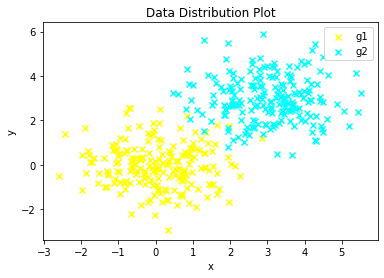

Probability of error =  0.025


In [511]:

f_plot(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2"),'Data Distribution Plot')

p1= 0.5
p = 0.5

gxx = (mean1.T@x)+(mean1.T@mean1)*(-1/2)+np.log(p1)-(mean.T@x)+(mean.T@mean)*(-1/2)+np.log(p)
gxy = (mean1.T@x1)+(mean1.T@mean1)*(-1/2)+np.log(p1)-(mean.T@x1)+(mean.T@mean)*(-1/2)+np.log(p)

a1  = []
a2 = []

for i in range(0,len(gxx)):
    if gxx[i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[i]<0:
        a2.append(i)
        
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]

b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)
    



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

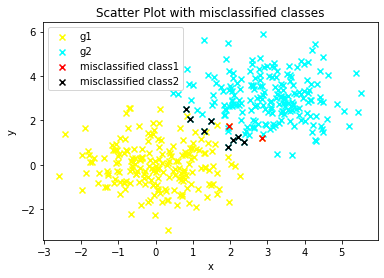

In [512]:
for i,j,k in zip(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend()
plt.show()

# Solution 2.2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


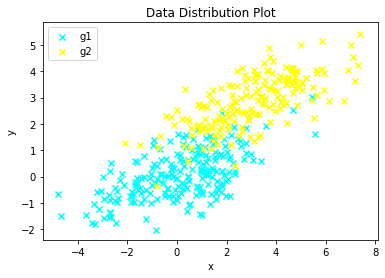

Probability of error =  0.08


In [500]:
p = [0.5,0.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([3,3])
cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = f_multivariateGaussian(mean, cov, samplingset[0]).T
x1 = f_multivariateGaussian(mean1, cov, samplingset[1]).T

mean = mean.reshape([2,1])
mean1 = mean1.reshape([2,1])

covinv = cov.I
f_plot(((x[0,:],x[1,:]), (x1[0,:],x1[1,:])),((0,1,1),(1,1,0)),("g1","g2"),'Data Distribution Plot')

p = 0.5
p1 = 0.5

gx11 = ((covinv@mean).T@x)+(mean.T@np.matmul(covinv,mean))*(-1/2)+np.log(p)
gx12 = ((covinv@mean).T@x1)+(mean.T@np.matmul(covinv,mean))*(-1/2)+np.log(p)

gx22 = ((covinv@mean1).T@x1)+(mean1.T@(covinv@mean1))*(-1/2)+np.log(p1)
gx21 = ((covinv@mean1).T@x)+(mean1.T@(covinv@mean1))*(-1/2)+np.log(p1)

gxx = (gx21-gx11)
gxy = (gx22-gx12)

a1  = []
a2 = []

[Q,q] = gxx.shape
[L,l] = gxy.shape

for i in range(0,q):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,l):
    if gxy[0,i]<0:
        a2.append(i)

b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

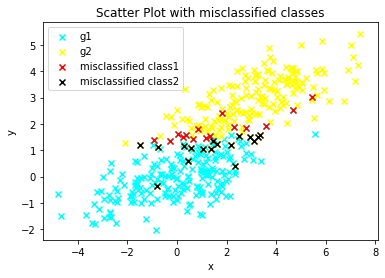

In [501]:
for i,j,k in zip(((x[0,:],x[1,:]), (x1[0,:],x1[1,:])),((0,1,1),(1,1,0)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend()
plt.show()

# Solution 2.3

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


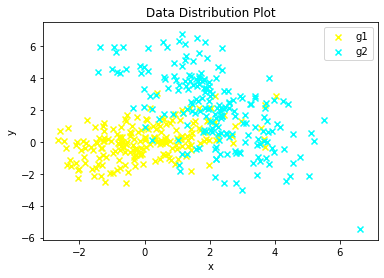

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Probability of error =  0.175


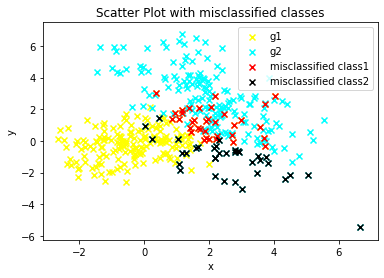

In [502]:
p = [0.5,0.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([2,2])

cov = np.matrix([[2,.5],[.5,1]],dtype=float)
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)

x = f_multivariateGaussian(mean, cov, samplingset[0]).T
x1 = f_multivariateGaussian(mean1, cov1, samplingset[1]).T

mean = mean.reshape([2,1])
mean1 = mean1.reshape([2,1])

covinv = cov.I
covinv1 = cov1.I

f_plot(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2"),'Data Distribution Plot')

gx11 = (x.T@((-(1/2)*(covinv))@x))+(((covinv@mean)).T@x)+((mean.T@(covinv@mean))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov)))
gx12 = (x1.T@((-(1/2)*(covinv))@x1))+(((covinv@mean)).T@x1)+((mean.T@(covinv@mean))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov)))

gx22 = (x1.T@((-(1/2)*(covinv1))@x1))+(((covinv1@mean1)).T@x1)+(mean1.T@(covinv1@mean1))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov1))
gx21 = (x.T@((-(1/2)*(covinv1))@x))+(((covinv1@mean1)).T@x)+(mean1.T@(covinv1@mean1))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov1))

gxx = (gx21-gx11)
gxy = (gx22-gx12)

a1  = []
a2 = []

for i in range(0,len(gxx)):
    if gxx[0,i]>0:
        a1.append(i)
        
for i in range(0,len(gxy)):
    if gxy[0,i]<0:
        a2.append(i)

b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)
    
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend()
plt.show()

# Solution 2.4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


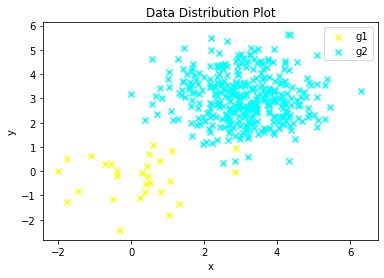

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(28,)
Probability of error =  0.06


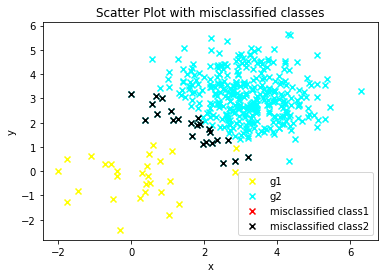

In [503]:
p = [0.05,0.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([3,3])

cov = np.identity(2)
cov1 = np.identity(2)

x = f_multivariateGaussian(mean, cov, samplingset[0]).T
x1 = f_multivariateGaussian(mean1, cov1, samplingset[1]).T

p = 0.05
p1 = 0.95

g1 = (x[0,:],x[1,:])
g2 = (x1[0,:],x1[1,:])

f_plot(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2"),title='Data Distribution Plot')

gxx = (mean1.T@x)+(mean1.T@mean1)*(-1/2)+np.log(p1)-(mean.T@x)+(mean.T@mean)*(-1/2)+np.log(p)
gxy = (mean1.T@x1)+(mean1.T@mean1)*(-1/2)+np.log(p1)-(mean.T@x1)+(mean.T@mean)*(-1/2)+np.log(p)

a1  = []
a2 = []
print(gxx.shape)
for i in range(0,len(gxx)):
    if gxx[i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[i]<0:
        a2.append(i)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)
    
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend()
plt.show()

# Solution 2.5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


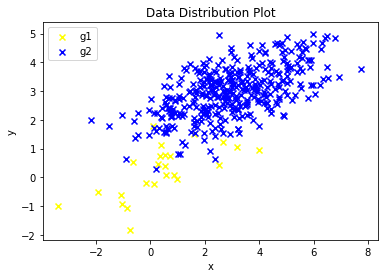

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[]
Probability of error =  0.0


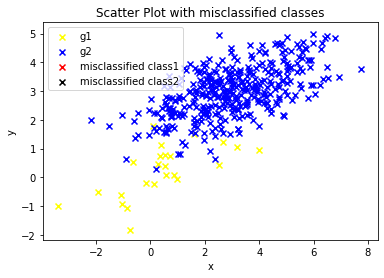

In [515]:
p = [0.05,0.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([3,3])

cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = f_multivariateGaussian(mean, cov, samplingset[0]).T
x1 = f_multivariateGaussian(mean1, cov, samplingset[1]).T

p = 0.05
p1 = 0.95

mean = mean.reshape([2,1])
mean1 = mean1.reshape([2,1])

covinv = cov.I
f_plot(((x[0,:],x[1,:]),((x1[0,:],x1[1,:]))),((1,1,0),(0,0,1)),("g1","g2"),'Data Distribution Plot')

gx11 = ((covinv@mean).T@x)+(mean.T@np.matmul(covinv,mean))*(-1/2)+np.log(p)
gx12 = ((covinv@mean).T@x1)+(mean.T@np.matmul(covinv,mean))*(-1/2)+np.log(p)

gx22 = ((covinv@mean1).T@x1)+(mean1.T@(covinv@mean1))*(-1/2)+np.log(p1)
gx21 = ((covinv@mean1).T@x)+(mean1.T@(covinv@mean1))*(-1/2)+np.log(p1)

gxx = (gx21-gx11)
gxy = (gx22-gx12)

a1  = []
a2 = []

for i in range(0,len(gxx)):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[0,i]<0:
        a2.append(i)
print(a1)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(((x[0,:],x[1,:]),((x1[0,:],x1[1,:]))),((1,1,0),(0,0,1)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)
    
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend(loc=2)
plt.show()

# Solution 2.6

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


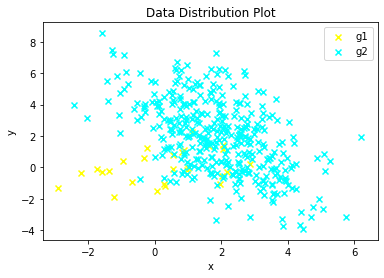

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Probability of error =  0.1975


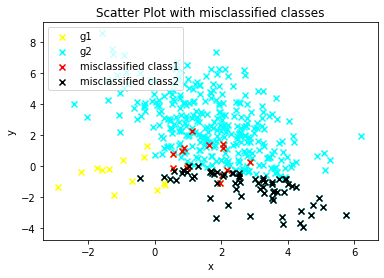

In [514]:
p = [0.05,0.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)

mean = np.array([0,0])
mean1 = np.array([2,2])

cov = np.matrix([[2,.5],[.5,1]],dtype=float)
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)

x = f_multivariateGaussian(mean, cov, samplingset[0]).T
x1 = f_multivariateGaussian(mean1, cov1, samplingset[1]).T

mean = mean.reshape([2,1])
mean1 = mean1.reshape([2,1])

covinv = cov.I
covinv1 = cov1.I

p = 0.05
p1 = 0.95

f_plot(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2"),'Data Distribution Plot')

gx11 = (x.T@((-(1/2)*(covinv))@x))+((covinv@mean).T@x)+(mean.T@(covinv@mean))*(-1/2)+np.log(p)-(1/2)*np.log(nplin.det(cov))

gx12 = (x1.T@((-(1/2)*(covinv))@x1))+((covinv@mean).T@x1)+(mean.T@(covinv@mean))*(-1/2)+np.log(p)-(1/2)*np.log(nplin.det(cov))

gx22 = (x1.T@((-(1/2)*(covinv1))@x1))+((covinv1@mean1).T@x1)+(mean1.T@(covinv1@mean1))*(-1/2)+np.log(p1)-(1/2)*np.log(nplin.det(cov1))
gx21 = (x.T@((-(1/2)*(covinv1))@x))+((covinv1@mean1).T@x)+(mean1.T@(covinv1@mean1))*(-1/2)+np.log(p1)-(1/2)*np.log(nplin.det(cov1))

gxx = (gx21-gx11)
gxy = (gx22-gx12)

a1  = []
a2 = []

for i in range(0,len(gxx)):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[0,i]<0:
        a2.append(i)

b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(((x[0,:],x[1,:]),(x1[0,:],x1[1,:])),((1,1,0),(0,1,1)),("g1","g2")):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "x")
    
error = (len(b1) + len(b2))/400
print('Probability of error = ',error)
    
plt.scatter(b1x,b1y,c =(1,0,0),label="misclassified class1", marker = "x")
plt.scatter(b2x,b2y,c =(0,0,0),label="misclassified class2", marker = "x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with misclassified classes')
plt.legend(loc=2)
plt.show()